

<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>

<h1>This notebook is for analyzing gene expression of Neil Shay's project </h1>
<p>
   Human liver  HepaRG  cells were treated with oaked and unoaked wine concentrates (OWC and UWC), a pure oak tannin powder (OTP), and two phytochemicals ellagic acid and Urolithin B (actually the second is a biotransformation of ellagic acid):  
      </p>
<ol>
  <li>The RNA from same treatment were mixed at equal amount and used for analaysis.</li>
    
  <li>The strand-switching protocol was used to prepare full-length cDNAs from total RNA.</li>
    
   
 <li>The cDNAs was amplified by PCR and added barcodes during the PCR step</li>
 <li>The PCR products are pooled and attached sequencing adapters.</li>
 <li>The cDNA library were loaded into the flow cell mounted on Nanopore MinIon MK1c sequencer and the sequencing experiment run for 72hr.</li>
 <li>RNA-seq data are analyzed in EPI2ME Labs </li>
    <ul>
         <li>minimap2 is used to align sequences reads against Homo sapiens (human) genome assembly GRCh38</li>
    <li> salmon is used to define the expressed genes and quantify aligned reads. </li>
     <li>Trimmed mean of M-values normalization method (TMM) is used to normalize the RNA expression ratio.</li>
    </ul>
 <li>The expressions of genes with reads >100 in control sample are used for this analysis</li>
   <li>The expression data in treated samples log2 of the fold change against control samples  </li>
    <li>The data is cleaned without Nah value to meet the requirement of PCA and KMeans cluster analysis.   </li>
    
 </ol>

</body>
</html>

In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
geneally=pd.read_csv('geneally.csv')

In [24]:
geneally.head()


,Reference,Log2owc,Log2uwc,Log2urob,Log2otp,Log2ea
0,ENST00000295834,-1.568256,-1.058108,-0.044703,-0.711059,-0.188234
1,ENST00000431156,-1.726043,-1.983816,-0.477140,-0.498142,-0.322432
2,ENST00000265641,-1.105326,-1.130164,-0.170014,-0.328494,-0.226501
3,ENST00000397990,-1.640631,-1.190132,-0.125344,-1.276938,-0.230667
4,ENST00000222002,-1.326830,-1.221089,-0.500883,-1.047075,-0.241118


In [25]:
geneally.corr()

,Log2owc,Log2uwc,Log2urob,Log2otp,Log2ea
Log2owc,1.000000,0.884636,0.541270,0.799196,0.632070
Log2uwc,0.884636,1.000000,0.609464,0.745710,0.615380
Log2urob,0.541270,0.609464,1.000000,0.645586,0.625783
Log2otp,0.799196,0.745710,0.645586,1.000000,0.636046
Log2ea,0.632070,0.615380,0.625783,0.636046,1.000000


<AxesSubplot:>

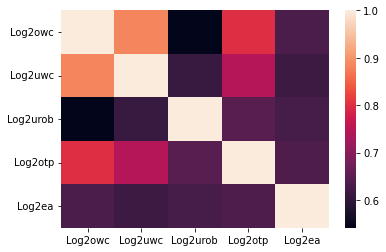

In [26]:
sns.heatmap(geneally.corr())

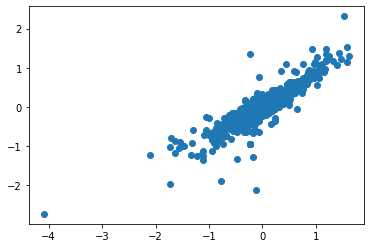

In [27]:
plt.scatter(data=geneally, x='Log2owc', y='Log2uwc')

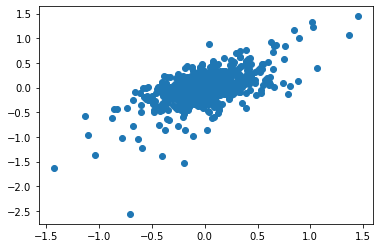

In [28]:
plt.scatter(data=geneally, x='Log2urob', y='Log2ea')

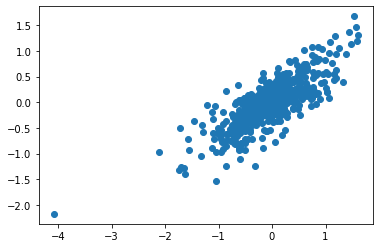

In [29]:
plt.scatter(data=geneally, x='Log2owc', y='Log2otp')

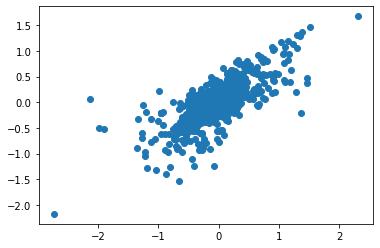

In [30]:
plt.scatter(data=geneally, x='Log2uwc', y='Log2otp')

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   2.,   4.,   4.,   3.,   9.,   7.,   9.,  15.,  29.,
         39.,  69., 103., 108.,  85.,  74.,  58.,  51.,  24.,  22.,  10.,
         15.,   8.,   6.,   7.,   6.,   6.,   4.,   3.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-2.73881521, -2.63769353, -2.53657186, -2.43545018, -2.3343285 ,
        -2.23320682, -2.13208514, -2.03096347, -1.92984179, -1.82872011,
        -1.72759843, -1.62647675, -1.52535508, -1.4242334 , -1.32311172,
        -1.22199004, -1.12086836, -1.01974669, -0.91862501, -0.81750333,
        -0.71638165, -0.61525997, -0.5141383 , -0.41301662, -0.31189494,
        -0.21077326, -0.10965158, -0.00852991,  0.09259177,  0.19371345,
         0.29483513,  0.39595681,  0.49707848,  0.59820016,  0.69932184,
         0.80044352,  0.9015652 ,  1.00268687,  1.10380855,  1.20493023,
         1.30605191,  1.40717359,  1.50829526,  1.60941694,  1.71053862,
 

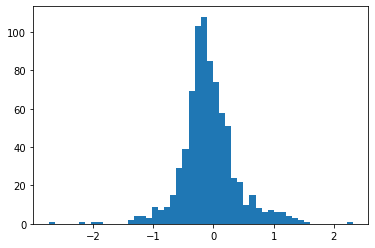

In [31]:
plt.hist(geneally['Log2uwc'], bins=50)

# PCA Aanalysis
The gene expression data are from five treatment. The data is five dimension. To find out gene ally. We need to perform cluster analysis that takes 2D data. So the first step is to perform PCA analysis to transforms the original features into a 2-D space while preserving the variance of the data. 

In [32]:
geneally.isnull().any().any()

False

In [35]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [36]:
scaler=StandardScaler()

In [42]:
ally_value=geneally[['Log2owc','Log2uwc','Log2urob','Log2otp','Log2ea']]

In [46]:
ally_value.head()

,Log2owc,Log2uwc,Log2urob,Log2otp,Log2ea
0,-1.568256,-1.058108,-0.044703,-0.711059,-0.188234
1,-1.726043,-1.983816,-0.477140,-0.498142,-0.322432
2,-1.105326,-1.130164,-0.170014,-0.328494,-0.226501
3,-1.640631,-1.190132,-0.125344,-1.276938,-0.230667
4,-1.326830,-1.221089,-0.500883,-1.047075,-0.241118


In [43]:
scaler_geneally=scaler.fit_transform(ally_value)

In [47]:
ally_normalized=pd.DataFrame(scaler_geneally, columns=ally_value.columns)

In [48]:
ally_normalized.head()

,Log2owc,Log2uwc,Log2urob,Log2otp,Log2ea
0,-2.893740,-2.106101,-0.121913,-1.730789,-0.535594
1,-3.203541,-4.094534,-1.645463,-1.195934,-0.957632
2,-1.984813,-2.260879,-0.563404,-0.769772,-0.655940
3,-3.035843,-2.389691,-0.406024,-3.152298,-0.669041
4,-2.419719,-2.456187,-1.729113,-2.574874,-0.701910


(array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   1.,   0.,   0.,   5.,   2.,   1.,   4.,
           5.,  10.,  12.,  21.,  36.,  52.,  97., 131., 112.,  81.,  68.,
          44.,  29.,  17.,  18.,  12.,  10.,   8.,   3.,   3.,   4.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
           0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   6.,   5.,
           4.,  11.,   7.,  20.,  35.,  53., 112., 132., 102.,  89.,  70.,
          45.,  22.,  12.,  16.,   9.,  10.,   6.,   7.,   4.,   3.,   3.,
           0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   0.,   2.,   1.,   0.,   1.,   2.,   2.,   4.,
           7.,   8.,  14.,  29.,  29.,  60.,  95., 109., 123.,  85.,  74.,
          43.,  27.,  23.,  13.,  10.,   8.,   5.,   3.,   3.,   2.,   0.,
        

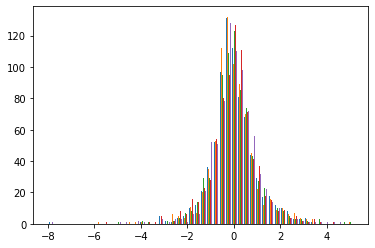

In [49]:
plt.hist(ally_normalized, bins=50)

In [56]:
pca=PCA(n_components=2, whiten =True)

In [57]:
ally_pca=pca.fit_transform(ally_normalized)

In [60]:
ally_pca

array([[ 1.77972071, -2.7161184 ],
       [ 2.62549986, -2.19700784],
       [ 1.48348528, -1.59813761],
       ...,
       [-0.27945496,  0.86526521],
       [-1.29624552,  1.45562543],
       [-0.280994  ,  1.53142476]])

In [58]:
pca.explained_variance_ratio_

array([0.74108017, 0.11268744])

In [59]:
sum(pca.explained_variance_ratio_)

0.8537676102691711

In [61]:
gene_pca=pd.DataFrame(ally_pca, columns=['pca1', 'pca2'])

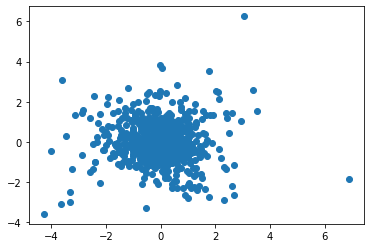

In [63]:
plt.scatter(data=gene_pca, x='pca1', y='pca2')

# KMeans cluster analysis

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pylab as pl
from itertools import cycle

In [73]:
model=KMeans(n_clusters=10)
model=model.fit(scale(gene_pca))

C:\Users\ywang120\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ywang120\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


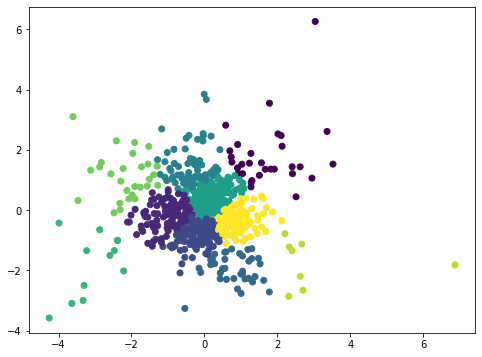

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(data=gene_pca, x='pca1', y='pca2', c=model.labels_.astype(float))
plt.show()

In [81]:
geneally['class']=model.labels_

In [82]:
geneally.head()

,Reference,Log2owc,Log2uwc,Log2urob,Log2otp,Log2ea,class
0,ENST00000295834,-1.568256,-1.058108,-0.044703,-0.711059,-0.188234,3
1,ENST00000431156,-1.726043,-1.983816,-0.477140,-0.498142,-0.322432,8
2,ENST00000265641,-1.105326,-1.130164,-0.170014,-0.328494,-0.226501,3
3,ENST00000397990,-1.640631,-1.190132,-0.125344,-1.276938,-0.230667,8
4,ENST00000222002,-1.326830,-1.221089,-0.500883,-1.047075,-0.241118,8
